# Jane Chinwuko
# Batch number: DS2307

### Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
# loaded the dataset to a Pandas DataFrame
temp_forecast = pd.read_csv('temperature.csv')

## Exploratory Data Analysis

In [3]:
#Viewing the first 10 rows of the dataset
temp_forecast.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [4]:
# Viewing the dimensions of the array
temp_forecast.shape

(7752, 25)

This dataset contains 7752 rows and 25 columns (made up of the independent and target variables)

In [5]:
#Viewing the columns present in the dataset
columns = temp_forecast.columns
columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
#Displays the basic information about the columns in the dataset
temp_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We have some missing values in our dataset. All our datatypes are float except the date column which is object datatype which should be in the datetime format. We will not be converting it because we shall be dropping the date column because we shall not be needing it for our predictions.

In [7]:
#displaying the descriptive statistics of all the features in the dataset
temp_forecast.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


The counts are not same indicting that there are missing values in our dataset.

In [8]:
#dropping the date column
temp_forecast=temp_forecast.drop(['station','Date'],axis=1)

We are dropping the date and station column because we will not be needing them for our predictions. 

In [9]:
#checking for missing values
temp_forecast.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We have some missing values.

In [10]:
#computation of the min and max values for the column LDAPS_WS
print('The Minimum LDAPS_WS value is {}m/s and the Maximum LDAPS_WS value is {}m/s'.format(temp_forecast['LDAPS_WS'].min(),temp_forecast['LDAPS_WS'].max()))

The Minimum LDAPS_WS value is 2.882579625m/s and the Maximum LDAPS_WS value is 21.85762099m/s


In [11]:
#computation of the min and max values for the column Solar radiation
print('The Minimum Solar radiation value is {} and the Maximum Solar radiation value is {}'.format(temp_forecast['Solar radiation'].min(),temp_forecast['Solar radiation'].max()))

The Minimum Solar radiation value is 4329.520508 and the Maximum Solar radiation value is 5992.895996


## Data Visualization

<AxesSubplot:xlabel='Solar radiation', ylabel='Count'>

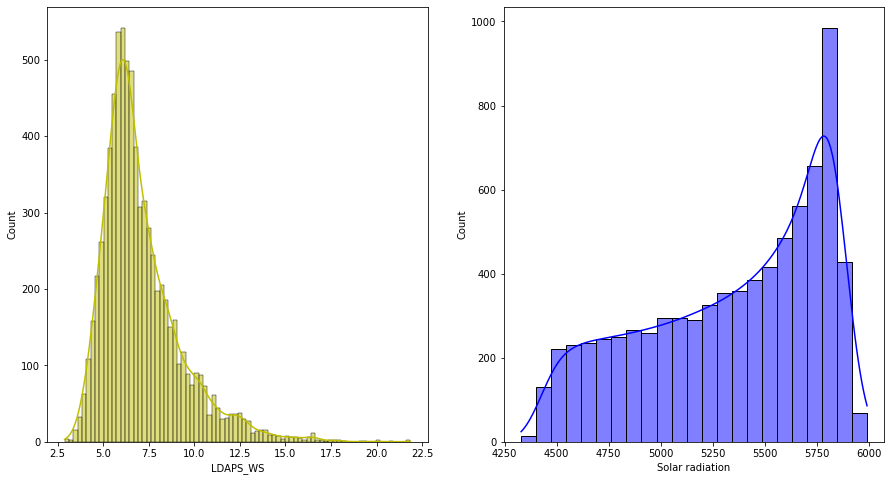

In [12]:
# histplot showing the forecast of next-day average wind speed and daily incoming solar radiation data distribution
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(temp_forecast['LDAPS_WS'],kde=True,color='y')
plt.subplot(1,2,2)
sns.histplot(temp_forecast['Solar radiation'],kde=True,color='b')

The distribution of our LDAPS_WS (LDAPS model forecast of next-day average wind speed) is skewed to the right. The Minimum LDAPS_WS value is 2.882579625m/s and the Maximum LDAPS_WS value is 21.85762099m/s. From the plot, we can see that the incoming solar radiation distribution is skewed to the left. The majority of its values fall between 5600 and 5850, with its minimum value being 4329.52 and its maximum value being 5992.89.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

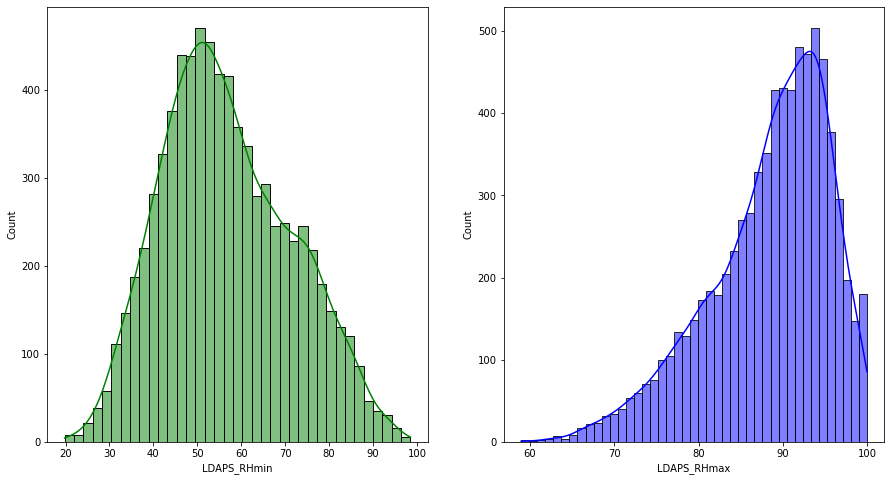

In [13]:
# histplot showing the minimun and maximum relative humidity data distribution
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(temp_forecast['LDAPS_RHmin'],kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(temp_forecast['LDAPS_RHmax'],kde=True,color='b')

There is a left skewness in the maximum relative humidity data distribution while the minimum relative humidity data distribution is close to normal but tending to right skewness. While RHmin typically ranges from 45 to 62, RHmax typically falls between 92 and 97 on most days.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

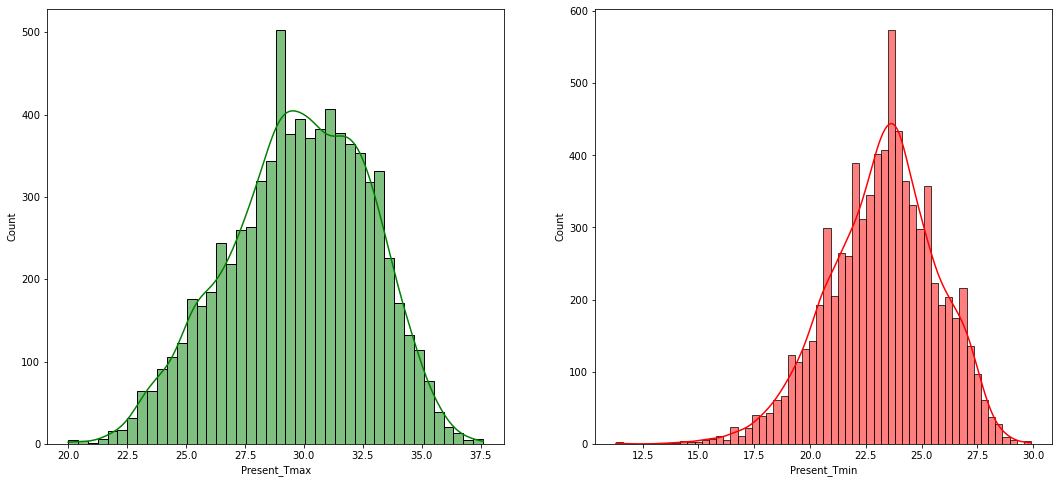

In [14]:
# histplot showing the data distribution of Maximum and mininum air temperature between 0 and 21 h on the present day 
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.histplot(temp_forecast['Present_Tmax'],kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(temp_forecast['Present_Tmin'],kde=True,color='r')


In [15]:
#Computation of the min, max and mean of Present_Tmax and Present_Tmin
print('The Minimum Tmax value is {} and the Maximum Tmax value is {}'.format(temp_forecast['Present_Tmax'].min(),temp_forecast['Present_Tmax'].max()))
print('The Minimum Tmin value is {} and the Maximum Tmin value is {}'.format(temp_forecast['Present_Tmin'].min(),temp_forecast['Present_Tmin'].max()))
print('Mean Tmax is {} and Mean Tmin is {}'.format(temp_forecast['Present_Tmax'].mean(),temp_forecast['Present_Tmin'].mean()))

The Minimum Tmax value is 20.0 and the Maximum Tmax value is 37.6
The Minimum Tmin value is 11.3 and the Maximum Tmin value is 29.9
Mean Tmax is 29.76821140328037 and Mean Tmin is 23.22505857849521


We can see that the Present_Tmax and Present_Tmin are almost normally distributed; Present_Tmax has a maximum temperature of 37.6 and a minimum temperature of 20 while Present_Tmin has a maximum temperature of 29.9 and a minimum temperature of 11.3.
The mean temperature of Present_Tmax and Present_Tmin are 29.7 and 23.2 respectively. 

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Count'>

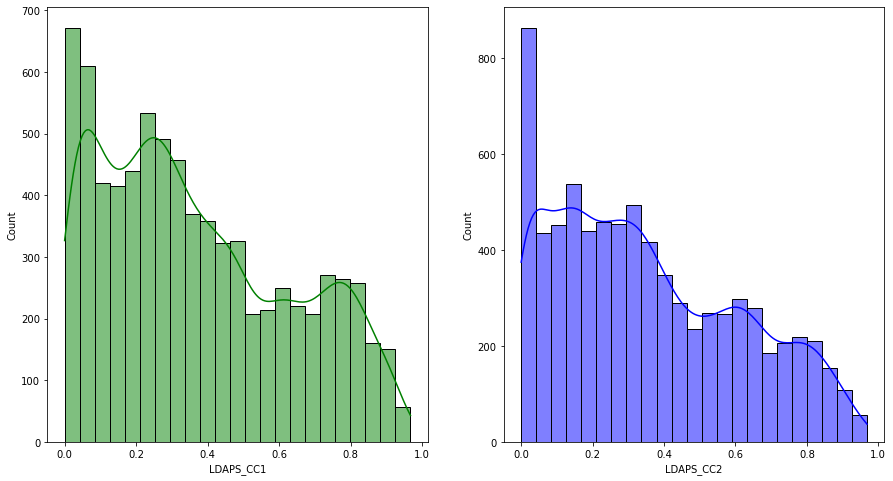

In [16]:
# histplot showing the data distribution of model forecast of next-day 1st and 2nd 6-hour split average cloud cover  
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(temp_forecast['LDAPS_CC1'],kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(temp_forecast['LDAPS_CC2'],kde=True,color='b')

Data distribution for LDAPS_CC1 and LDAPS_CC2 are both skewed to the right. Most of the values are close to zero.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Count'>

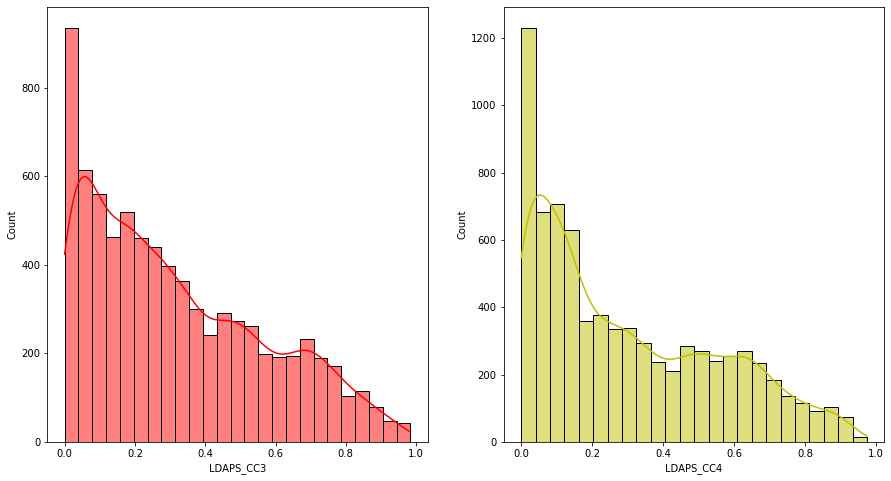

In [17]:
# histplot showing the data distribution of model forecast of next-day 3rd and 4th 6-hour split average cloud cover  
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(temp_forecast['LDAPS_CC3'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(temp_forecast['LDAPS_CC4'],kde=True,color='y')

Data distribution for LDAPS_CC3 and LDAPS_CC4 are both skewed to the right. Most of the values are close to zero.

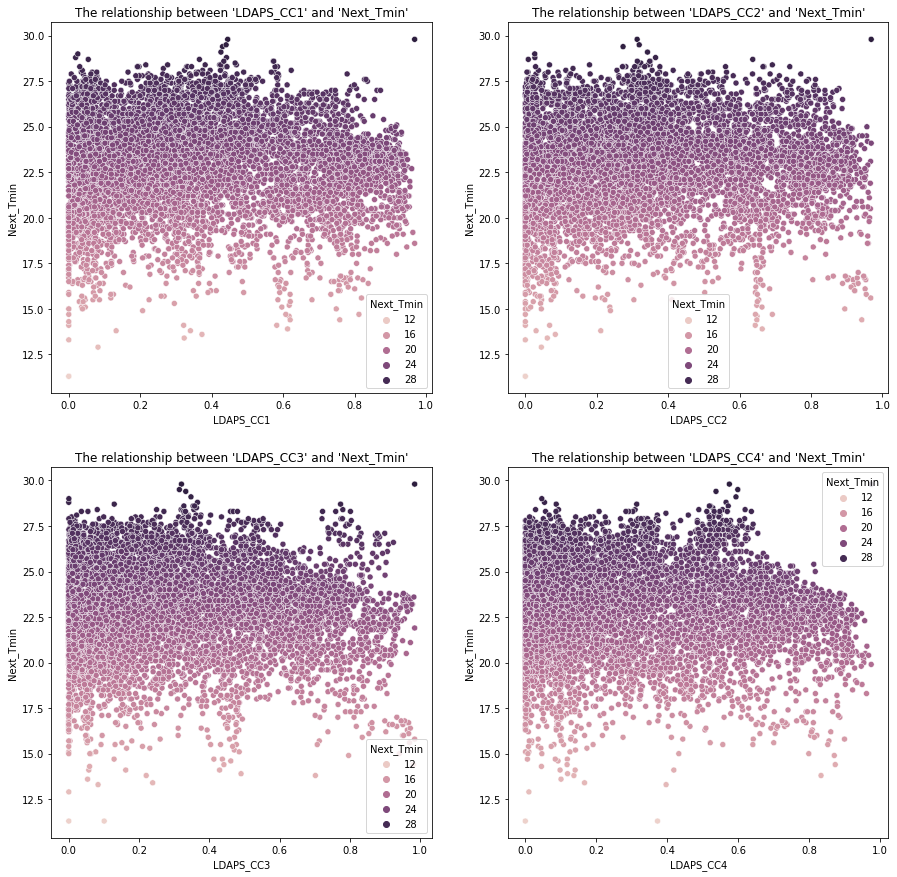

In [18]:
# These scatterplots are is used to visualize the relationships between variables
fig, axes = plt.subplots(2, 2, figsize=(15, 15)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "LDAPS_CC1",
                y = "Next_Tmin", hue = "Next_Tmin",
                data = temp_forecast).set(title = "The relationship between 'LDAPS_CC1' and 'Next_Tmin'");

sns.scatterplot(ax = axes[1],
                x = "LDAPS_CC2",
                y = "Next_Tmin", hue = "Next_Tmin",
                data = temp_forecast).set(title = "The relationship between 'LDAPS_CC2' and 'Next_Tmin'");

sns.scatterplot(ax = axes[2],
                x = "LDAPS_CC3",
                y = "Next_Tmin", hue = "Next_Tmin",
                data = temp_forecast).set(title = "The relationship between 'LDAPS_CC3' and 'Next_Tmin'");

sns.scatterplot(ax = axes[3],
                x = "LDAPS_CC4",
                y = "Next_Tmin", hue = "Next_Tmin",
                data = temp_forecast).set(title = "The relationship between 'LDAPS_CC4' and 'Next_Tmin'");

There seems to be no relationship between Next day Maximum Temperature and the average cloud cover. 

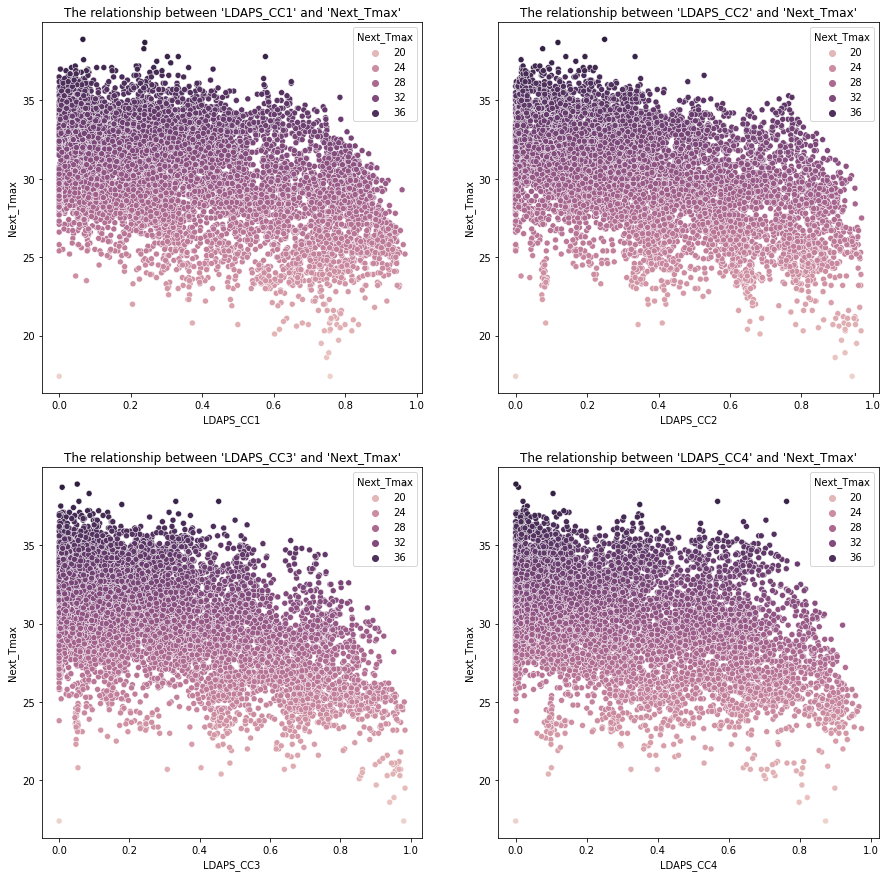

In [19]:
# These scatterplots are is used to visualize the relationships between variables
fig, axes = plt.subplots(2, 2, figsize=(15, 15)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "LDAPS_CC1",
                y = "Next_Tmax", hue = "Next_Tmax",
                data = temp_forecast).set(title = "The relationship between 'LDAPS_CC1' and 'Next_Tmax'");

sns.scatterplot(ax = axes[1],
                x = "LDAPS_CC2",
                y = "Next_Tmax", hue = "Next_Tmax",
                data = temp_forecast).set(title = "The relationship between 'LDAPS_CC2' and 'Next_Tmax'");

sns.scatterplot(ax = axes[2],
                x = "LDAPS_CC3",
                y = "Next_Tmax", hue = "Next_Tmax",
                data = temp_forecast).set(title = "The relationship between 'LDAPS_CC3' and 'Next_Tmax'");

sns.scatterplot(ax = axes[3],
                x = "LDAPS_CC4",
                y = "Next_Tmax", hue = "Next_Tmax",
                data = temp_forecast).set(title = "The relationship between 'LDAPS_CC4' and 'Next_Tmax'");

From the scatterplot, we can see that as the next-day maximum air temperature decreases, the average cloud cover increases.

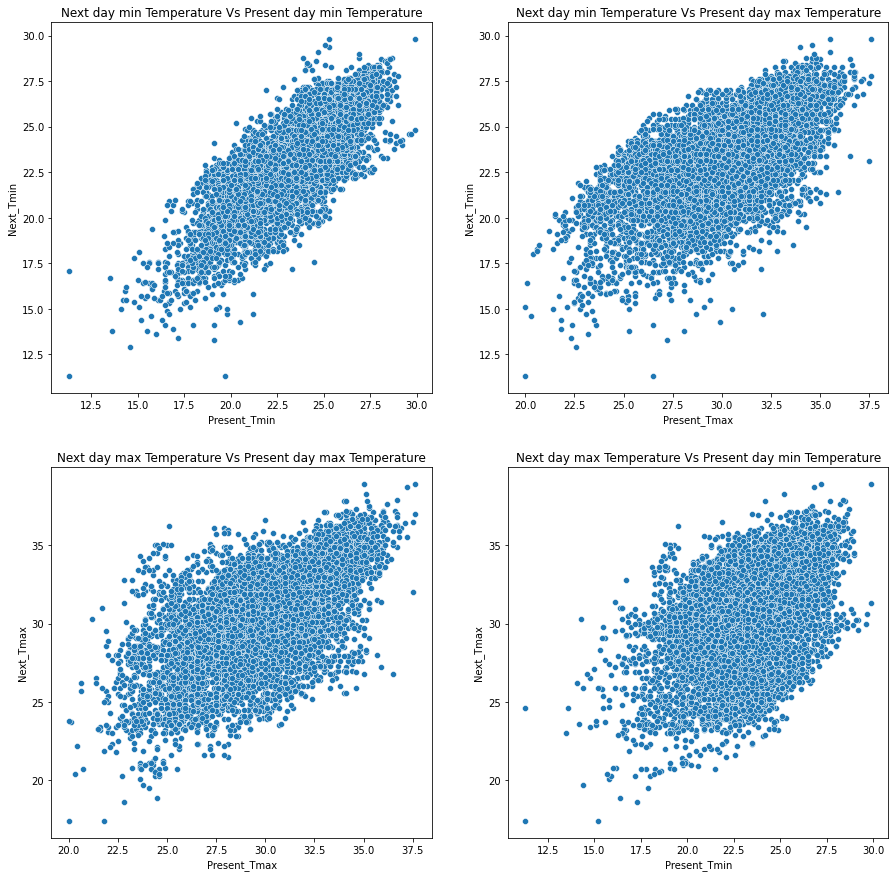

In [20]:
# These scatterplots are is used to visualize the relationships between variables
fig, axes = plt.subplots(2, 2, figsize=(15, 15)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "Present_Tmin",
                y = "Next_Tmin",
                data = temp_forecast).set(title = "Next day min Temperature Vs Present day min Temperature");

sns.scatterplot(ax = axes[1],
                x = "Present_Tmax",
                y = "Next_Tmin",
                data = temp_forecast).set(title = "Next day min Temperature Vs Present day max Temperature");

sns.scatterplot(ax = axes[2],
                x = "Present_Tmax",
                y = "Next_Tmax", 
                data = temp_forecast).set(title = "Next day max Temperature Vs Present day max Temperature");

sns.scatterplot(ax = axes[3],
                x = "Present_Tmin",
                y = "Next_Tmax",
                data = temp_forecast).set(title = "Next day max Temperature Vs Present day min Temperature");


From the scatterplot, we can see that there is a high positive correlation between Next day temperatures and the present day temperatures. As the air temperature of the present day increases, the air temperature of the next day also increases.

<AxesSubplot:>

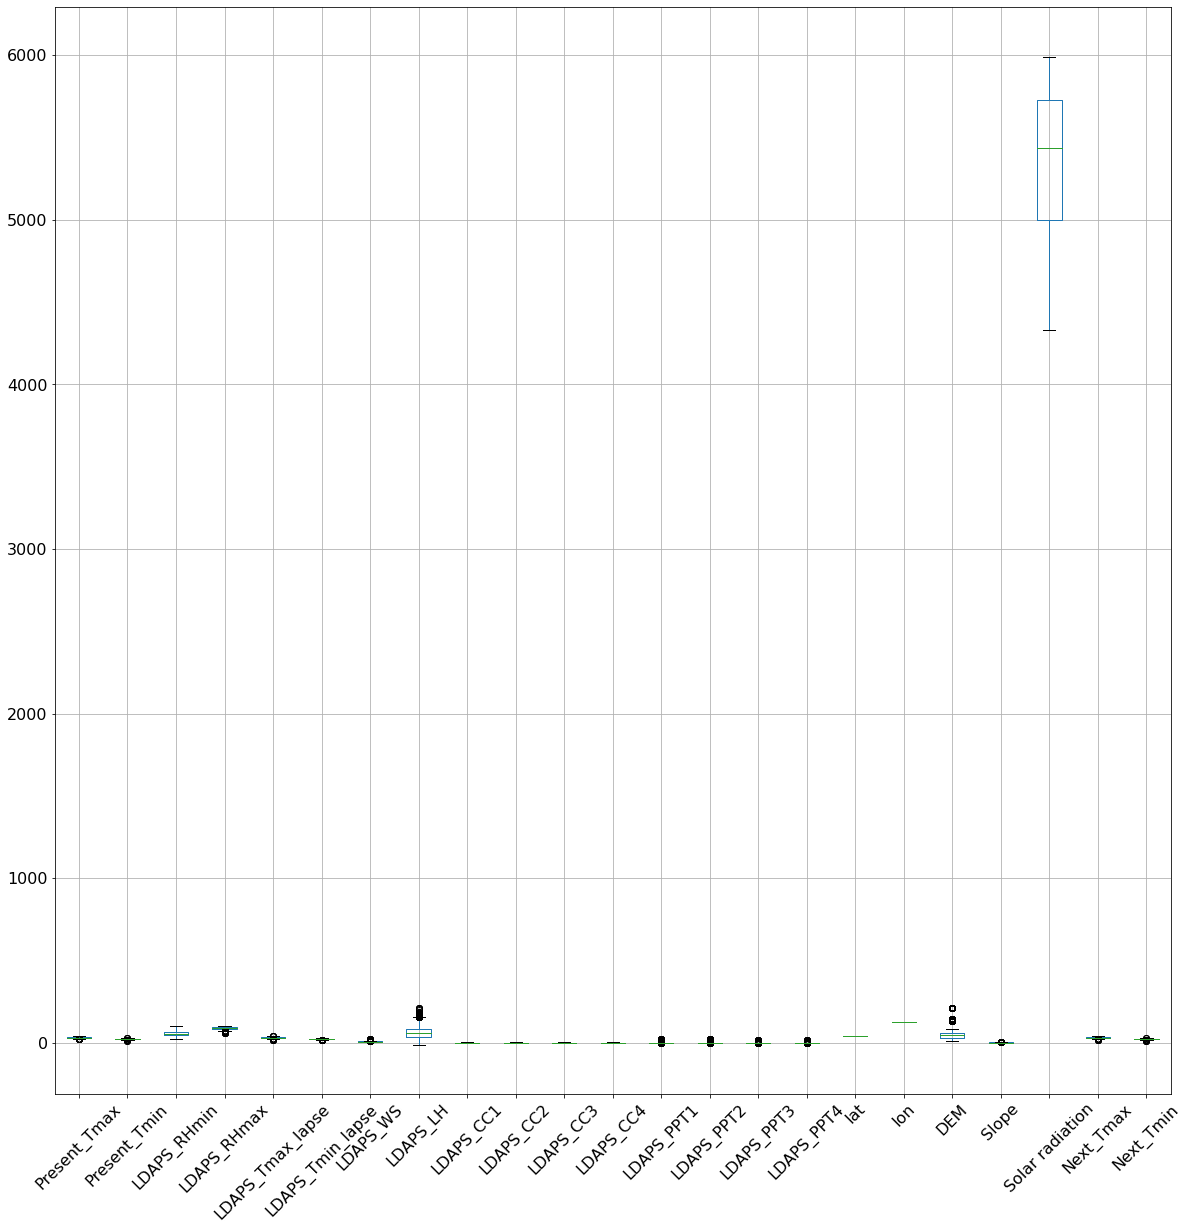

In [21]:
# Boxplot containing all the columns
temp_forecast.boxplot(column=temp_forecast.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)

There are some outliers in our dataset. We shall treat them.

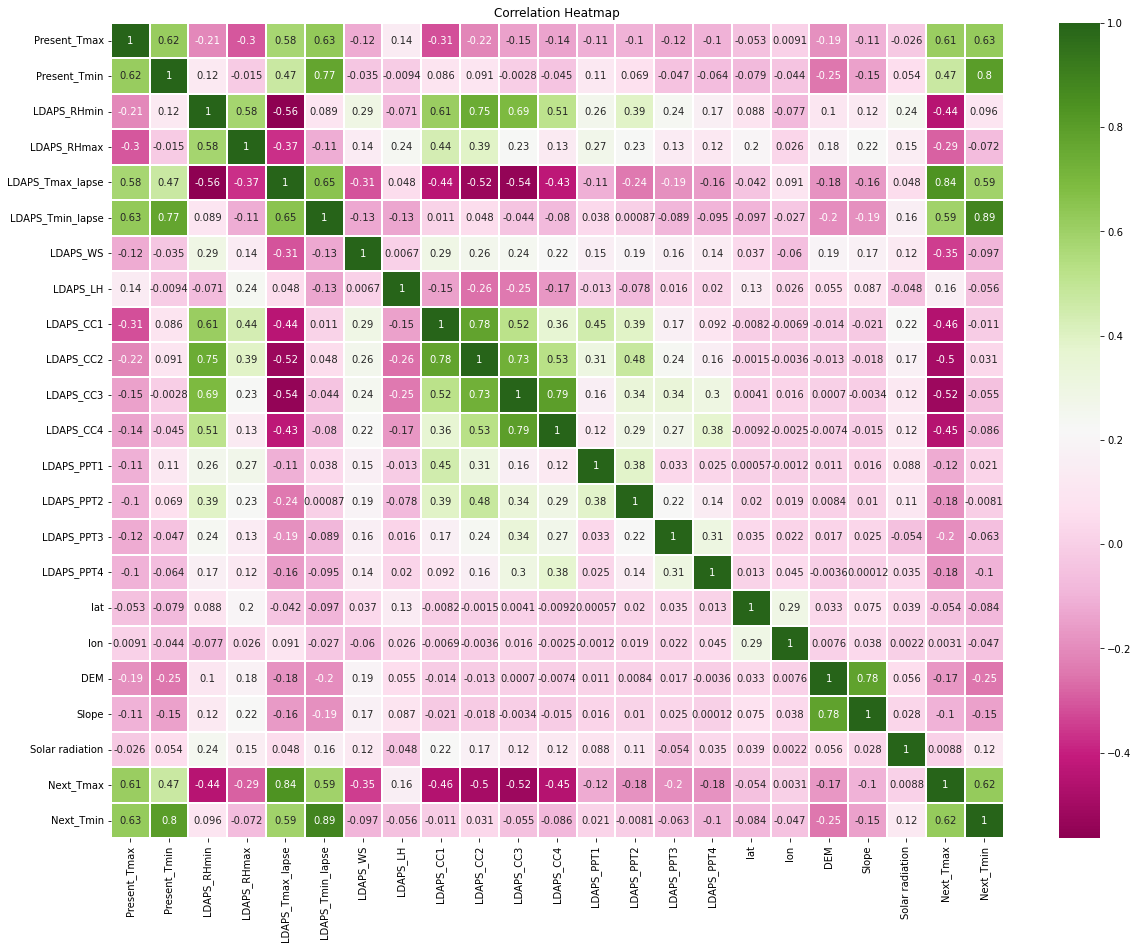

In [22]:
# Using heatmap to visualize the correlation between the numerical features.

plt.figure(figsize=(20,15))
sns.heatmap(temp_forecast.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap we can that there is high correlation between most of the independent features e.g there is a high correlation between the mininmum temperature of the next day and the present mininum temperature. There is also a high correlation between Next_Tmin and LDAPS_Tmin_lapse, Next_Tmax and LDAPS_Tmin_lapse. We conclude that Multicollinearity exist between most of our independent features.

## Data Pre-Processing

In [23]:
#checking for missing values
missing_values= temp_forecast.isna().sum()
missing_values

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [24]:
# Calculate the total number of values present in each columns of our dataset
total_count = temp_forecast.count() + missing_values
total_count

Present_Tmax        7752
Present_Tmin        7752
LDAPS_RHmin         7752
LDAPS_RHmax         7752
LDAPS_Tmax_lapse    7752
LDAPS_Tmin_lapse    7752
LDAPS_WS            7752
LDAPS_LH            7752
LDAPS_CC1           7752
LDAPS_CC2           7752
LDAPS_CC3           7752
LDAPS_CC4           7752
LDAPS_PPT1          7752
LDAPS_PPT2          7752
LDAPS_PPT3          7752
LDAPS_PPT4          7752
lat                 7752
lon                 7752
DEM                 7752
Slope               7752
Solar radiation     7752
Next_Tmax           7752
Next_Tmin           7752
dtype: int64

In [25]:
#dividing the missing values by total values and multply the result by 100
missing_percent = (missing_values / total_count) * 100
# Print the results
print(missing_percent) 

Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64


The percentages of the missing values is very small; 0.96% in most columns. So it's safe to drop the missing values.

In [26]:
#dropping the null values in the dataset
temp_forecast = temp_forecast.dropna()

We are dropping the null values because the percentage of of the missing values is small and will not take away a lot of information from our data.

In [27]:
#checking for missing values after droppig the missing values
temp_forecast.isna().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

No more missing values in our data

In [28]:
#removing outliers using Inter Quartile Range approach
def quantile(columns):
    for column in columns:
        lower_quantile = temp_forecast[column].quantile(0.25)
        upper_quantile = temp_forecast[column].quantile(0.75)
        temp_forecast.loc[(temp_forecast[column] <= lower_quantile), column] = lower_quantile
        temp_forecast.loc[(temp_forecast[column] >= upper_quantile), column] = upper_quantile

columns =temp_forecast.columns.tolist()
quantile(columns)

We removed the ourliers using the Inter Quartile Range approach

<AxesSubplot:>

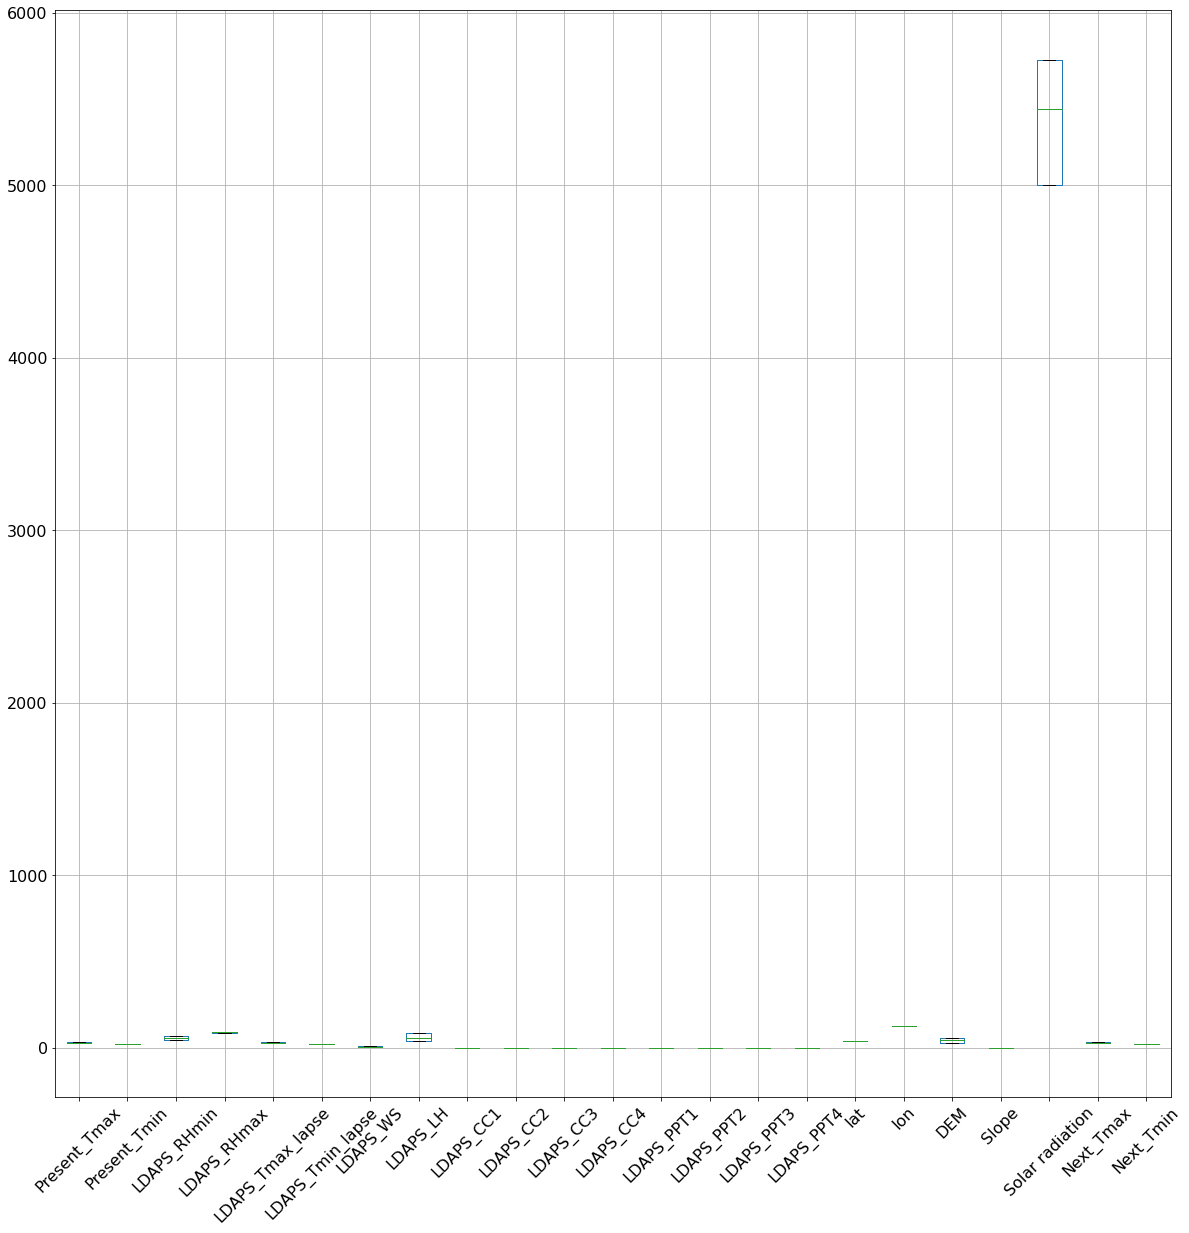

In [29]:
# Boxplot containing all the columns
temp_forecast.boxplot(column=temp_forecast.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)

We can see that the outliers have now been removed

In [30]:
# splitting our data into X(Independant variables) and y(target variable)
x = temp_forecast.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_nxtmax_train = temp_forecast['Next_Tmax']
y_nxtmin_train = temp_forecast['Next_Tmin']

We are going to have two target variables(Next_Tmax and Next_Tmin) because we intend to make predictions for Next_Tmax and Next_Tmin. Meaning we shall be building two models for the prediction of each of the variables.

In [31]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x)
X_test=sc.transform(x)
tabel_col = x.columns
X = pd.DataFrame(X_train, columns = tabel_col)
X

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.705043,-1.284631,0.259109,0.474885,-0.989676,-0.530737,0.072149,0.518328,-0.653014,-0.774290,...,-0.800132,-0.650706,-0.634375,-0.628009,-0.577654,1.167822,-0.034260,1.165033,1.405935,1.131479
1,1.168920,-1.284631,-0.440122,0.342826,0.093124,0.299211,-1.109403,-0.398863,-0.702005,-0.490995,...,-0.818727,-0.650706,-0.634375,-0.628009,-0.577654,1.167822,0.888477,0.033220,-0.623374,1.131479
2,0.993236,0.035912,-0.857041,-1.309328,0.239767,0.727575,-0.641463,-1.170314,-0.795843,-0.457278,...,-0.735087,-0.650706,-0.634375,-0.628009,-0.577654,1.167822,1.113534,-0.827139,-1.016384,1.131479
3,1.227482,0.113592,0.257254,1.152927,0.004103,-0.273018,-1.126748,0.323275,-0.755042,-0.643478,...,-0.780843,-0.650706,-0.634375,-0.628009,-0.577654,1.167822,0.663419,0.104839,1.405935,1.131479
4,0.876114,-1.051594,0.016211,0.226782,-0.355915,-0.143608,-1.064201,1.292741,-1.132177,-0.501505,...,-0.573035,-0.650706,-0.634375,-0.628009,-0.577654,0.226713,1.113534,-0.697119,-0.637295,1.131479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,-1.232096,-1.284631,-1.175649,-1.309328,-1.233784,-1.273684,-0.630251,0.654824,-1.160407,-1.151275,...,-1.087730,-0.650706,-0.634375,-0.628009,-0.577654,-0.245591,-1.249571,-1.173127,-1.016384,-1.305994
7586,-1.232096,-1.284631,-1.175649,-1.309328,-1.233784,-1.273684,-0.217282,-0.644782,-1.160407,-1.151275,...,-1.087730,-0.650706,-0.634375,-0.628009,-0.577654,-0.717895,-1.249571,-1.173127,-1.016384,-1.305994
7587,-1.232096,-1.284631,-1.175649,-1.309328,-1.071704,-1.273684,0.565296,-1.170314,-1.160407,-1.151275,...,-1.087730,-0.650706,-0.634375,-0.628009,-0.577654,-0.717895,-0.506881,-1.173127,-1.016384,-1.305994
7588,-1.232096,-1.284631,-1.175649,-1.309328,-1.233784,-1.273684,-1.126748,-1.170314,-1.160407,-1.151275,...,-1.087730,-0.650706,-0.634375,-0.628009,-0.577654,-1.190199,-1.249571,-1.173127,-1.016384,-1.305994


 We need to scale our variables so that they have a similar scale. We used StandardScaler to achieve that.

In [32]:
# splitting the features into train and test for Next_Tmax  and Next_Tmin 
X_train, X_test, y_nxtmax_train, y_nxtmax_test = train_test_split(X, y_nxtmax_train, test_size = 0.20, random_state = 42)
X_train, X_test, y_nxtmin_train, y_nxtmin_test = train_test_split(X, y_nxtmin_train, test_size = 0.20, random_state = 42)
# Viewing the dimensions of our training and testing data
X_train.shape,X_test.shape,y_nxtmax_train.shape,y_nxtmin_train.shape,y_nxtmin_test.shape,y_nxtmax_test.shape

((6072, 21), (1518, 21), (6072,), (6072,), (1518,), (1518,))

We splitted our data in X_train, X_test, y_nxtmax_train, y_nxtmin_train, y_nxtmin_test and y_nxtmax_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 80% of our data will be used to train the model while 20% will be used for model validation.

## 1. AdaBoost Regressor

### Model for Minimum Temperature

In [33]:
#AdaBoost Algorithm
Nextmin_results = []
Nextmax_results = []
ad = AdaBoostRegressor()
ad.fit(X_train, y_nxtmin_train)
ypredad_min = ad.predict(X_test)
train_predadmin = ad.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmin_test, ypredad_min)
msqe = metrics.mean_squared_error(y_nxtmin_test, ypredad_min)
r2_score = metrics.r2_score(y_nxtmin_test, ypredad_min)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmin_test, ypredad_min))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmin_train,train_predadmin))
print('\n')

mean_absolute_error :  0.5936320988408258
mean_squared_error  :  0.49893083656271764
root_mean_absolute_error 0.7063503638865897
R2_score            :  0.7167857117169083
R2_score on training data :  0.7373479687926838




### Cross Validation Score for AdaBoost Regressor(Next_Tmin)

In [34]:
cv_scoremin = cross_val_score(ad,X_train,y_nxtmin_train, cv=5, scoring = 'r2')
print(cv_scoremin)
print(cv_scoremin.mean())
cross_valmin = cv_scoremin.mean()
diff = r2_score - cross_valmin
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmin_test,ypredad_min)- cv_scoremin.mean()}')
Nextmin_results.append(['AdaBoost Regressor', r2_score, cross_valmin, diff])

[0.70053552 0.70670373 0.7400224  0.72190868 0.71102908]
0.7160398823364739
The difference between the R2 score and the cross validation score is: 0.0007458293804344374


### Model for Maximum Temperature

In [35]:
#AdaBoost Algorithm
ad = AdaBoostRegressor()
ad.fit(X_train, y_nxtmax_train)
ypredad_max = ad.predict(X_test)
train_predadmax = ad.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmax_test, ypredad_max)
msqe = metrics.mean_squared_error(y_nxtmax_test, ypredad_max)
r2_score = metrics.r2_score(y_nxtmax_test, ypredad_max)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmax_test, ypredad_max))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmax_train,train_predadmax))
print('\n')

mean_absolute_error :  0.8663904654469421
mean_squared_error  :  1.0844773141890376
root_mean_absolute_error 1.0413824053579155
R2_score            :  0.6550406117246599
R2_score on training data :  0.6721312433562074




### Cross Validation Score for AdaBoost Regressor(Next_Tmax)    

In [36]:
cv_scoremax = cross_val_score(ad,X_train,y_nxtmax_train, cv=5, scoring = 'r2')
print(cv_scoremax)
print(cv_scoremax.mean())
cross_valmax = cv_scoremax.mean()
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmax_test,ypredad_max)- cv_scoremax.mean()}')
diff = r2_score - cross_valmax
Nextmax_results.append(['AdaBoost Regressor', r2_score, cross_valmax, diff])

[0.67660673 0.63867612 0.64205724 0.64635236 0.66432312]
0.6536031178706146
The difference between the R2 score and the cross validation score is: 0.0014374938540452353


## 2. Random Forest Regressor

### Model for Minimum Temperature

In [37]:
#Random Forest Regressor Algorithm
random_for= RandomForestRegressor()
random_for.fit(X_train, y_nxtmin_train)
y_predmin = random_for.predict(X_test)
train_predrdmin = random_for.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmin_test, y_predmin)
msqe = metrics.mean_squared_error(y_nxtmin_test, y_predmin)
r2_score = metrics.r2_score(y_nxtmin_test, y_predmin)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmin_test, y_predmin))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmin_train,train_predrdmin))
print('\n')

mean_absolute_error :  0.3438866930171328
mean_squared_error  :  0.25303547694334794
root_mean_absolute_error 0.503026318340649
R2_score            :  0.856366339257376
R2_score on training data :  0.9800142504510496




Model is performing better on the training data than on the testing data which indicates overfitting

### Cross Validation Score for Random Forest Regressor(Next_Tmin)  

In [38]:
cv_score1_min = cross_val_score(random_for,X_train,y_nxtmin_train, cv=5, scoring = 'r2')
print(cv_score1_min)
print(cv_score1_min.mean())
cross_valmin = cv_score1_min.mean()
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmin_test,y_predmin)- cv_score1_min.mean()}')
diff = r2_score - cross_valmin
Nextmin_results.append(['Random Forest Regressor', r2_score, cross_valmin, diff])

[0.85544591 0.85200399 0.85429379 0.84485243 0.85188852]
0.8516969281832247
The difference between the R2 score and the cross validation score is: 0.004669411074151308


### Model for Maximum Temperature

In [39]:
#Random Forest Regressor Algorithm
random_for= RandomForestRegressor()
random_for.fit(X_train, y_nxtmax_train)
y_predmax = random_for.predict(X_test)
train_predrdmax = random_for.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmax_test, y_predmax)
msqe = metrics.mean_squared_error(y_nxtmax_test, y_predmax)
r2_score = metrics.r2_score(y_nxtmax_test, y_predmax)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmax_test, y_predmax))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmax_train,train_predrdmax))
print('\n')

mean_absolute_error :  0.4444071146245107
mean_squared_error  :  0.4160355296442712
root_mean_absolute_error 0.645008162463291
R2_score            :  0.8676640258591168
R2_score on training data :  0.9801147709419465




Model is performing better on the training data than on the testing data which indicates overfitting

### Cross Validation Score for Random Forest Regressor(Next_Tmax)  

In [40]:
cv_score1_max = cross_val_score(random_for,X_train,y_nxtmax_train, cv=5, scoring = 'r2')
print(cv_score1_max)
print(cv_score1_max.mean())
cross_valmax = cv_score1_max.mean()
diff = r2_score - cross_valmax
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmax_test,y_predmax)- cv_score1_max.mean()}')
Nextmax_results.append(['Random Forest Regressor', r2_score, cross_valmax, diff])

[0.86087425 0.82590162 0.82920826 0.83976925 0.86350395]
0.8438514665236589
The difference between the R2 score and the cross validation score is: 0.023812559335457895


## 3. Decision Tree Regressor

### Model for Minimum Temperature

In [41]:
#Decision Tree Algorithm
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_nxtmin_train)
ypred_dcmin = dec_tree.predict(X_test)
train_preddcmin = dec_tree.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmin_test, ypred_dcmin)
msqe = metrics.mean_squared_error(y_nxtmin_test, ypred_dcmin)
r2_score = metrics.r2_score(y_nxtmin_test, ypred_dcmin)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmin_test, ypred_dcmin))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmin_train,train_preddcmin))
print('\n')

mean_absolute_error :  0.46442687747036066
mean_squared_error  :  0.5856126482213441
root_mean_absolute_error 0.7652533229077441
R2_score            :  0.6675814417120398
R2_score on training data :  1.0




Model is performing better on the training data than on the testing data which indicates overfitting

### Cross Validation Score for Decision Tree Regressor(Next_Tmin)  

In [42]:
cv_score2_min = cross_val_score(dec_tree,X_train,y_nxtmin_train, cv=5, scoring = 'r2')
print(cv_score2_min)
print(cv_score2_min.mean())
cross_valmin = cv_score2_min.mean()
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmin_test,ypred_dcmin)- cv_score2_min.mean()}')
diff = r2_score - cross_valmin
Nextmin_results.append(['Decision Tree Regressor', r2_score, cross_valmin, diff])

[0.70556715 0.7029541  0.69896327 0.68437025 0.73733945]
0.7058388408818043
The difference between the R2 score and the cross validation score is: -0.03825739916976445


### Model for Maximum Temperature

In [43]:
#Decision Tree Algorithm
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_nxtmax_train)
ypred_dcmax = dec_tree.predict(X_test)
train_preddcmax = dec_tree.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmax_test, ypred_dcmax)
msqe = metrics.mean_squared_error(y_nxtmax_test, ypred_dcmax)
r2_score = metrics.r2_score(y_nxtmax_test, ypred_dcmax)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmax_test, ypred_dcmax))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmax_train,train_preddcmax))
print('\n')

mean_absolute_error :  0.5533596837944833
mean_squared_error  :  0.9048748353096184
root_mean_absolute_error 0.951249092146541
R2_score            :  0.7121700329088263
R2_score on training data :  1.0




Model is performing better on the training data than on the testing data which indicates overfitting

### Cross Validation Score for Decision Tree Regressor(Next_Tmax)  

In [44]:
cv_score2_max = cross_val_score(dec_tree,X_train,y_nxtmax_train, cv=5, scoring = 'r2')
print(cv_score2_max)
print(cv_score2_max.mean())
cross_valmax = cv_score2_max.mean()
diff = r2_score - cross_valmax
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmax_test,ypred_dcmax)- cv_score2_max.mean()}')
Nextmax_results.append(['Decision Tree Regressor', r2_score, cross_valmax, diff])

[0.71164608 0.60604857 0.67968425 0.67927168 0.6874973 ]
0.6728295769667172
The difference between the R2 score and the cross validation score is: 0.03934045594210911


## 4. Gradient Boosting Regressor

### Model for Minimum Temperature

In [45]:
#Gradient Boosting Algorithm
gb = GradientBoostingRegressor()
gb.fit(X_train, y_nxtmin_train)
ypredgb_min = gb.predict(X_test)
train_predgbmin = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmin_test, ypredgb_min)
msqe = metrics.mean_squared_error(y_nxtmin_test, ypredgb_min)
r2_score = metrics.r2_score(y_nxtmin_test, ypredgb_min)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmin_test, ypredgb_min))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmin_train,train_predgbmin))
print('\n')

mean_absolute_error :  0.4046027745640866
mean_squared_error  :  0.3003433223036652
root_mean_absolute_error 0.5480358768398883
R2_score            :  0.829512401252194
R2_score on training data :  0.8554054580167816




### Cross Validation Score for Gradient Boosting Regressor(Next_Tmin)

In [46]:
cv_score3_min = cross_val_score(gb,X_train,y_nxtmin_train, cv=5, scoring = 'r2')
print(cv_score3_min)
print(cv_score3_min.mean())
cross_valmin = cv_score3_min.mean()
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmin_test,ypredgb_min)- cv_score3_min.mean()}')
diff = r2_score - cross_valmin
Nextmin_results.append(['Gradient Boosting Regressor', r2_score, cross_valmin, diff])

[0.83704366 0.83347742 0.83299456 0.82632735 0.82844202]
0.8316570027145243
The difference between the R2 score and the cross validation score is: -0.002144601462330198


### Model for Maximum Temperature

In [47]:
#Gradient Boosting Algorithm
gb = GradientBoostingRegressor()
gb.fit(X_train, y_nxtmax_train)
ypredgb_max = gb.predict(X_test)
train_predgbmax = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmax_test, ypredgb_max)
msqe = metrics.mean_squared_error(y_nxtmax_test, ypredgb_max)
r2_score = metrics.r2_score(y_nxtmax_test, ypredgb_max)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmax_test, ypredgb_max))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmax_train,train_predgbmax))
print('\n')

mean_absolute_error :  0.6033798144285439
mean_squared_error  :  0.669885072600571
root_mean_absolute_error 0.8184650710937951
R2_score            :  0.7869174930303852
R2_score on training data :  0.8139317134079246




### Cross Validation Score for Gradient Boosting Regressor(Next_Tmax)

In [48]:
cv_score3_max = cross_val_score(gb,X_train,y_nxtmax_train, cv=5, scoring = 'r2')
print(cv_score3_max)
print(cv_score3_max.mean())
cross_valmax = cv_score3_max.mean()
diff = r2_score - cross_valmax
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmax_test,ypredgb_max)- cv_score3_max.mean()}')
Nextmax_results.append(['Gradient Boosting Regressor', r2_score, cross_valmax, diff])

[0.79130817 0.76951195 0.76744198 0.77387927 0.80639723]
0.7817077209578911
The difference between the R2 score and the cross validation score is: 0.005209772072494068


## 5. Ridge

### Model for Minimum Temperature

In [49]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_nxtmin_train)
ypred_rdmin = Ridge.predict(X_test)
train_predrdmin = Ridge.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmin_test, ypred_rdmin)
msqe = metrics.mean_squared_error(y_nxtmin_test, ypred_rdmin)
r2_score = metrics.r2_score(y_nxtmin_test, ypred_rdmin)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmin_test, ypred_rdmin))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmin_train,train_predrdmin))
print('\n')

mean_absolute_error :  0.4742811346975166
mean_squared_error  :  0.4087863304546392
root_mean_absolute_error 0.6393640046598176
R2_score            :  0.7679555538455598
R2_score on training data :  0.7700483072929553




### Cross Validation Score for Ridge(Next_Tmin)   

In [50]:
cv_score4_min = cross_val_score(Ridge,X_train,y_nxtmin_train, cv=5, scoring = 'r2')
print(cv_score4_min)
print(cv_score4_min.mean())
cross_valmin = cv_score4_min.mean()
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmin_test,ypred_rdmin)- cv_score4_min.mean()}')
diff = r2_score - cross_valmin
Nextmin_results.append(['Ridge', r2_score, cross_valmin, diff])

[0.77487137 0.77054843 0.77829308 0.75688651 0.7567589 ]
0.7674716580740585
The difference between the R2 score and the cross validation score is: 0.00048389577150131924


### Model for Maximum Temperature

In [51]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_nxtmax_train)
ypred_rdmax = Ridge.predict(X_test)
train_predrdmax = Ridge.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmax_test, ypred_rdmax)
msqe = metrics.mean_squared_error(y_nxtmax_test, ypred_rdmax)
r2_score = metrics.r2_score(y_nxtmax_test, ypred_rdmax)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmax_test, ypred_rdmax))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmax_train,train_predrdmax))
print('\n')

mean_absolute_error :  0.7252998654117568
mean_squared_error  :  0.9288671658082596
root_mean_absolute_error 0.9637775499607052
R2_score            :  0.7045383567604875
R2_score on training data :  0.6886304067334226




### Cross Validation Score for Ridge(Next_Tmax)   

In [52]:
cv_score4_max = cross_val_score(Ridge,X_train,y_nxtmax_train, cv=5, scoring = 'r2')
print(cv_score4_max)
print(cv_score4_max.mean())
cross_valmax = cv_score4_max.mean()
diff = r2_score - cross_valmax
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_nxtmax_test,ypred_rdmax)- cv_score4_max.mean()}')
Nextmax_results.append(['Ridge', r2_score, cross_valmax, diff])

[0.70732586 0.66881781 0.66816727 0.6749158  0.70691267]
0.6852278807261639
The difference between the R2 score and the cross validation score is: 0.019310476034323565


In [53]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df_ntmin = pd.DataFrame(Nextmin_results, columns=['Algorithm', 'r2 Score','Cross Validation Score', 'Difference btw r2_score and Cross Validtion Score'])
df_ntmin

,Algorithm,r2 Score,Cross Validation Score,Difference btw r2_score and Cross Validtion Score
0,AdaBoost Regressor,0.716786,0.716040,0.000746
1,Random Forest Regressor,0.856366,0.851697,0.004669
2,Decision Tree Regressor,0.667581,0.705839,-0.038257
3,Gradient Boosting Regressor,0.829512,0.831657,-0.002145
4,Ridge,0.767956,0.767472,0.000484


In [54]:
#Selection of the best model based on the difference between the r2 and cross validation score
least_value = min(df_ntmin['Difference btw r2_score and Cross Validtion Score'].tolist())
best_model = df_ntmin.loc[(df_ntmin['Difference btw r2_score and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model for Next_Tmin Prediction is the', best_model)

From the table above, my best model for Next_Tmin Prediction is the Decision Tree Regressor


In [55]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df_ntmax = pd.DataFrame(Nextmax_results, columns=['Algorithm', 'r2 Score','Cross Validation Score', 'Difference btw r2_score and Cross Validtion Score'])
df_ntmax

,Algorithm,r2 Score,Cross Validation Score,Difference btw r2_score and Cross Validtion Score
0,AdaBoost Regressor,0.655041,0.653603,0.001437
1,Random Forest Regressor,0.867664,0.843851,0.023813
2,Decision Tree Regressor,0.712170,0.672830,0.039340
3,Gradient Boosting Regressor,0.786917,0.781708,0.005210
4,Ridge,0.704538,0.685228,0.019310


In [56]:
#Selection of the best model based on the difference between the r2 and cross validation score
least_value = min(df_ntmax['Difference btw r2_score and Cross Validtion Score'].tolist())
best_model = df_ntmax.loc[(df_ntmax['Difference btw r2_score and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model for Next_Tmax Prediction is the', best_model)

From the table above, my best model for Next_Tmax Prediction is the AdaBoost Regressor


## Selection of best model for Next_Tmax and Next_Tmin Predictions

We selected the model with the least result after substracting the r2 score from the cross validation score as our best model.
For the Next_Tmin prediction our best model was the Decision Tree Regression model while for the Next_Tmax prediction, our best model was the AdaBoost Regression model.

### Tuning for Next_Tmin Best Model

In [57]:
#Search for the best hyperparameter for model tuning 
from sklearn.model_selection import GridSearchCV

best_modelnxtmin = DecisionTreeRegressor()

model_param = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100]
}

In [58]:
gd_search = GridSearchCV(best_modelnxtmin, model_param, cv = 5)

gd_search.fit(X_train, y_nxtmin_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [59]:
#display the best parameters from the search
print("\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best min_samples_leaf: " + str(gd_search.best_params_["min_samples_leaf"]))


The best max_depth: 10 
The best min_samples_leaf: 10


In [60]:
# train the model with the selected parameters
nextmin_model = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 10)

In [61]:
nextmin_model.fit(X_train, y_nxtmin_train)

y_pred = nextmin_model.predict(X_test)
train_predrd = nextmin_model.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmin_test, y_pred)
msqe = metrics.mean_squared_error(y_nxtmin_test, y_pred)
r2_score = metrics.r2_score(y_nxtmin_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmin_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmin_train,train_predrd))
print('\n')


mean_absolute_error :  0.4267360538033114
mean_squared_error  :  0.4193388273143014
root_mean_absolute_error 0.6475637631263051
R2_score            :  0.7619655093970982
R2_score on training data :  0.8827291228342714




In [62]:
import pickle
# save the model to disk
filename = 'Next_Tmin.sav'
pickle.dump(nextmin_model, open(filename, 'wb'))

In [63]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_nxtmin_test)
result

0.7619655093970982

In [64]:
accuracy_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_nxtmin_test[:]],index=['Next_Tmin Predicted','Next_Tmin Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517
Next_Tmin Predicted,24.415789,21.396689,24.091667,23.884615,23.242857,24.025,21.396689,21.43,22.117647,22.554545,...,24.552907,24.472289,23.875,23.264286,21.61,24.589744,23.91,21.451351,24.463636,21.346237
Next_Tmin Original,24.600000,21.300000,24.600000,24.500000,23.300000,24.300,21.500000,21.30,21.300000,22.100000,...,23.400000,23.700000,21.300,23.300000,22.70,24.600000,24.60,21.300000,24.400000,21.300000


### Tuning for Next_Tmax Best Model

In [65]:
#Search for the best hyperparameter for model tuning 
from sklearn.model_selection import GridSearchCV

best_modelnxtmax = AdaBoostRegressor()

model_param =  {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}

In [66]:
gd_search = GridSearchCV(best_modelnxtmax, model_param, cv = 5)

gd_search.fit(X_train, y_nxtmin_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [1]})

In [68]:
#display the best parameters from the search
print("The best n_estimators is : " + str(gd_search.best_params_["n_estimators"]),
      "\nThe best learning_rate is : " + str(gd_search.best_params_["learning_rate"]),
     "\nThe best random_state: " + str(gd_search.best_params_["random_state"]))

The best n_estimators is : 500 
The best learning_rate is : 0.01 
The best random_state: 1


In [69]:
# train the model with the selected parameters
nextmax_model = AdaBoostRegressor(n_estimators  = 500 , learning_rate  = 0.01, random_state = 1)

In [70]:
nextmax_model.fit(X_train, y_nxtmax_train)

y_pred = nextmax_model.predict(X_test)
train_predrd = nextmax_model.predict(X_train)
mse = metrics.mean_absolute_error(y_nxtmax_test, y_pred)
msqe = metrics.mean_squared_error(y_nxtmax_test, y_pred)
r2_score = metrics.r2_score(y_nxtmax_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_nxtmax_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_nxtmax_train,train_predrd))
print('\n')


mean_absolute_error :  0.8367041197406689
mean_squared_error  :  1.0757765498301755
root_mean_absolute_error 1.037196485642993
R2_score            :  0.6578082218087908
R2_score on training data :  0.6750685552321087




In [71]:
import pickle
# save the model to disk
filename = 'Next_Tmax.sav'
pickle.dump(nextmax_model, open(filename, 'wb'))

In [72]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_nxtmax_test)
result

0.6578082218087908

In [73]:
accuracy_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_nxtmax_test[:]],index=['Next_Tmax Predicted','Next_Tmax Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517
Next_Tmax Predicted,30.528831,29.993605,30.624587,32.068584,29.369413,31.622733,29.438719,29.939206,29.58114,29.655118,...,32.191582,28.687894,29.910361,30.328021,31.078135,30.205331,30.813504,30.049574,32.191582,29.201535
Next_Tmax Original,29.600000,29.500000,32.600000,32.600000,29.400000,28.900000,29.600000,28.600000,30.80000,28.200000,...,32.600000,28.700000,30.600000,30.400000,29.300000,29.900000,32.600000,29.500000,32.600000,28.200000


### Conclusion

We used the temperature dataset as our case study to make predictions for next-day minimum and maximum air temperature. The dataset is made up 7752 rows and 25 columns. Of these columns, we have 24 independent variables and 1 target variable(either Next_Tmin  or Next_Tmax). Most of the columns have missing values although the percentage was very low so we dropped the columns having the missing values. We visualized the data distribution and relationships between some features. For this project, we built two models to make predictions for Next_Tmin and Next_Tmax. We used different algorithms to train our model. 80% of the data was used for taining while 20% was used for validation. The criteria we used in the selection of best model is the model with the least result after substracting the r2 score from cross validation score. 

#### Next_Tmin Prediction:

We selected the Decision Tree Regression model as our best model because it had the least result from the difference between our  r2_score and Cross Validation Score. We tuned the best model and observed that there was an improvement in the r2 score obtained. The r2_score before tuning was 0.667581 and 0.76196 after tuning. Looking at the predictions, we can see that the predicted values are close to the actual values. 

#### Next_Tmax Prediction:

We selected the Adaboost Regression model as our best model because it had the least result from the difference between our  r2_score and Cross Validation Score. We tuned the best model and observed that there was no much improvement in the r2 score obtained. The r2_score before tuning was 0.655041 and 0.657808 after tuning. Looking at the predictions, we can see that the predicted values are close to the actual values. To improve the r2 score further, we will need to tune the model with other parameters.